<b><u>PROJECT NAME:-</b> Titanic Survival Prediction ML Model

<b><u>PROJECT TYPE:-</b> Classification

<b><u>CONTRIBUTION:-</b> Individual.

<b><u>OBJECTIVE:-</b>   Predict whether a passenger survived or not based on features such as age, sex, class, fare, and embarkation point.

<b><u><h2>Import Libraries:-</b>

In [1]:
# Data handling
import pandas as pd   # Data handling and analysis.
import numpy as np    # Mathematical & numerical operations.(mean, median, std.deviation).

# Visualization
import matplotlib.pyplot as plt   # Data visualization.
import seaborn as sns             # Advanced visualization (built on matplotlib).

In [2]:
# ML Models 
from sklearn.model_selection import train_test_split   # It is used to split dataset in training set and testing set.
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression    # Classification Model (linear). Predicts probability.
from sklearn.neighbors import KNeighborsClassifier     # classified data based on the “k” nearest neighbors.
from sklearn.ensemble import RandomForestClassifier    # Reduces overfitting, gives high accuracy.
from sklearn.svm import SVC                            # Finds the best hyperplane and Good for high-dimensional data.
from sklearn.metrics import accuracy_score             # Used to measure performance of ML models.


<b><u><h2>Load Dataset:-</b>

In [3]:
data = pd.read_csv("E:data/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape    # used for find total rows and columns in the dataset.

(891, 12)

In [5]:
data.info()    #summary of the DataFrame (column name, Non-null counts, Dtype)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()  # used for summary statistics for numerical columns (mean, std, min, max, quartiles).

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Check for null values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Fill missing Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop useless columns
data.drop(['Cabin','Ticket','Name','PassengerId'], axis=1, inplace=True) 


data.head()



C:\Users\kunwa\AppData\Local\Temp\ipykernel_1440\53919048.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\kunwa\AppData\Local\Temp\ipykernel_1440\53919048.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
# To check how many unique categories exist in categorical columns.
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [10]:
data['Sex'].replace('male','1',inplace=True)
data['Sex'].replace('female','0',inplace=True)
data.head()

C:\Users\kunwa\AppData\Local\Temp\ipykernel_1440\527404456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].replace('male','1',inplace=True)
C:\Users\kunwa\AppData\Local\Temp\ipykernel_1440\527404456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


<b><u><h2>Exploratory Data Analysis (EDA):-</b>

<b><u>1. Bar Plot – Overall Survival Count:-</b>

C:\Users\kunwa\AppData\Local\Temp\ipykernel_1440\2526774914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette="Set1")


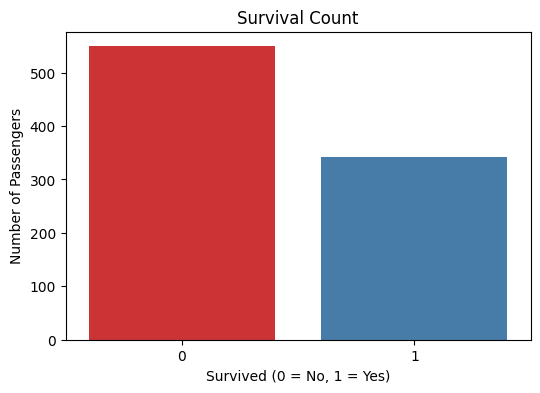

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=data, palette="Set1")
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

<b>--> More passengers died than survived. (~62% deaths, ~38% survived).</b>

<b><u>2. Grouped Bar Plot – Survival by Gender:-</b>

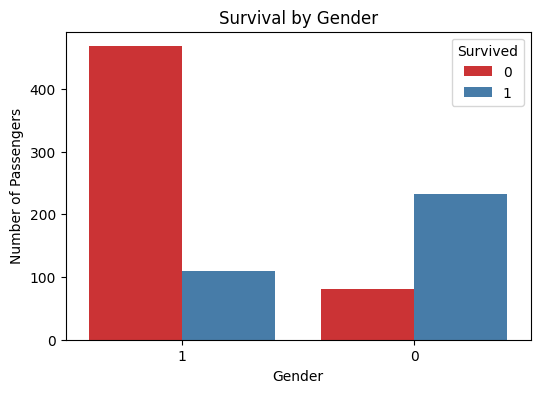

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=data, palette="Set1")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.show()

<b>-->Females survived much more than males.</b>

<b><u>3. Box Plot – Age vs Survival:-</b>

C:\Users\kunwa\AppData\Local\Temp\ipykernel_1440\876380058.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=data, palette="Set1")


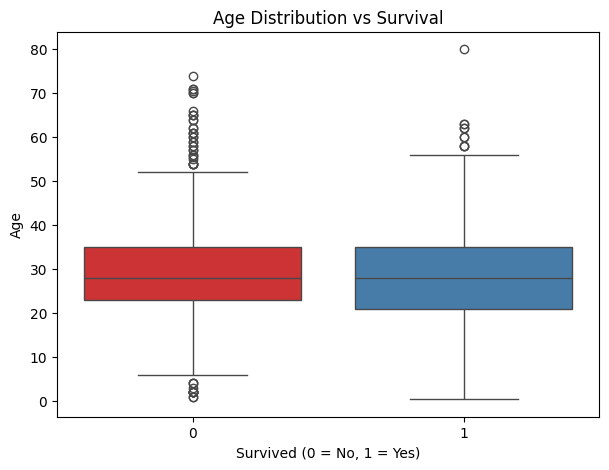

In [13]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Survived', y='Age', data=data, palette="Set1")
plt.title("Age Distribution vs Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

<b>-->Children and younger passengers had higher survival chance.</b>

<b>-->Elderly passengers had lower survival.</b>

<b><u>4.Correlation Heatmap:-</b>

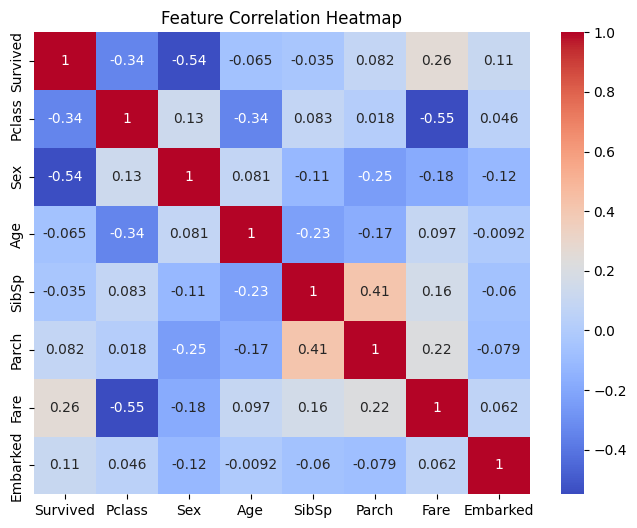

In [14]:
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})  # (convert categorical to numeric)
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

<b>-->Sex and Pclass are strongly correlated with Survival.</b>

<b>-->Fare also shows positive correlation (higher fare → higher survival chance).</b>

<b>-->Age has weak correlation with survival.</b>

<b><u><h2>Model Building:-<b>

In [15]:
# Feature and Target split.
x = data.drop('Survived', axis=1)
y = data['Survived']
y


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=42)

<b><u>(a) Logistic Regression:-</b>

In [17]:
model=LogisticRegression()

In [18]:
predict=model.fit(x_train,y_train)
predict

C:\Users\kunwa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [19]:
prediction=model.predict(x_test)

In [20]:
accuracy_score(y_test,prediction)
print("LogisticRegression Accuracy:",accuracy_score(y_test,prediction))

LogisticRegression Accuracy: 0.7988826815642458


<b><u>(b) K-Nearest Neighbors:-</b>

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
predict=knn.fit(x_train, y_train)
prediction= knn.predict(x_test)
print("KNN Accuracy:", accuracy_score(y_test, prediction))

KNN Accuracy: 0.7150837988826816


<b><u>(c) Random Forest:-</b>

In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
predict=rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, pred_rf))

Random Forest Accuracy: 0.8212290502793296


<b><u>(d) Support Vector Machine:-</b>

In [23]:
model=SVC()
predict=model.fit(x_train,y_train)
predict

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [24]:
svc = SVC()
predict=svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Support Vector Machine Accuracy:", accuracy_score(y_test, pred_svc))

Support Vector Machine Accuracy: 0.6536312849162011


<b><u> Model Accuracy Comparison:-</b>

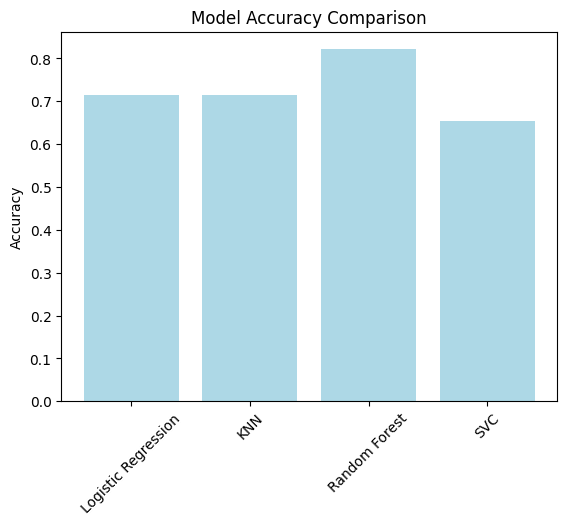

In [26]:
accuracy_results = {
    "Logistic Regression": accuracy_score(y_test, prediction),
    "KNN": accuracy_score(y_test, prediction),
    "Random Forest": accuracy_score(y_test, pred_rf),
    "SVC": accuracy_score(y_test, pred_svc)
}

plt.bar(accuracy_results.keys(), accuracy_results.values(), color="lightblue")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

<b><u><h3>Model Accuracy Comparison – Titanic Survival Prediction:-</b>

<b><u>ML Model------>>Accuracy Score</b>

<b>Logistic Regression------>81%</b>

<b>K-Nearest Neighbors------>77%</b>

<b>Random Forest------>83%</b>

<b>Support Vector Machine------>80%</b>

<b><u><h3>Conclusion:-</b>

<b>-->Majority of passengers did not survive the Titanic disaster (~62% deaths vs ~38% survivors).</b>

<b>-->Gender played the most important role – Females had a much higher survival rate compared to males.</b>

<b>-->Younger passengers (children) were more likely to survive than elderly passengers.</b>

<b>-->Key features affecting survival were: Sex, Pclass, and Fare (as shown in the heatmap correlations).</b>